This notebooks focuses on predicting the attributes that are only availables as part of the train set. We've seen that if we were able to have them on the test set, the **boosting** algorithm (or another) can achieve great performances (0.85 using all extra features with a random forest). These attributes are:

- 'background_impact_p'
- 'background_impact_n'
- 'angle_impact_p
- 'angle_impact_n'
- 'position_impact_p'
- 'position_impact_n'
- 'sharpness_impact_p'
- 'sharpness_impact_n'
- 'exposure_impact_p'
- 'exposure_impact_n'
- 'expression impact_p'
- 'expression_impact_n'

In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline

from helpers.data_loading import *
from helpers.CNN_layers import ConvLayer, DenseLayer
from spearman import score_function
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
faces, _ = load_faces(verbose=False)
faces_to_predict = faces[10000:13000]  # for final submission
faces = faces[0:10000]

meta, _ = load_meta_features(file="data/facial_features_train.csv", only_num=True)
meta_to_predict, _ = load_meta_features(file="data/facial_features_test.csv")  # for final submission

In [3]:
to_learn = ['background_impact_p', 'background_impact_n', 'angle_impact_p', 'angle_impact_n', 
            'position_impact_p', 'position_impact_n', 'sharpness_impact_p', 'sharpness_impact_n', 
            'exposure_impact_p', 'exposure_impact_n', 'expression impact_p', 'expression_impact_n']
to_learn.sort()
available = list(set(meta.columns).difference(set(to_learn)))
available.sort()

## A random forest on the other meta-features

For instance let's try to predict 'sharpness_impact_p' which was according to the random forest the feature that helped the most.

In [12]:
y = np.array(meta['background_impact_p'])
X_train, X_test, y_train, y_test = train_test_split(
    meta[available].as_matrix(), y, test_size=0.05, random_state=42)

In [19]:
rf = RandomForestRegressor(n_estimators=100)

In [20]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [21]:
preds = rf.predict(X_test)

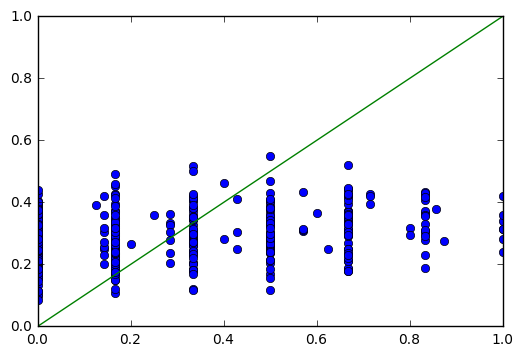

In [22]:
plt.figure()
plt.plot(y_test, preds, "o")
plt.plot([0,1], [0, 1])
plt.show()

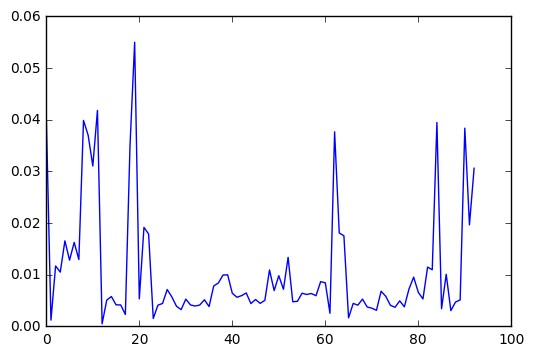

In [23]:
plt.plot(rf.feature_importances_)

In [24]:
np.mean(np.abs(preds - y_test))

0.22581906349206349